# Assiginment2 
# Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

import pylab as pl


/Users/bohan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('Salaries.csv')

/Users/bohan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### As demonstrated before, this dataset includes the four years' salaries, and the trend is the same, so in order to have a better view, we select the 2014' data to process, and also clean the bad data

In [3]:
df = df.loc[df['Year']==2014]

In [4]:
df = df.loc[df['TotalPayBenefits']>0]

In [5]:
df = df.loc[df['TotalPay']>0]

In [6]:
df['BasePay'] = pd.to_numeric(df['BasePay'])
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'])
df['OtherPay'] = pd.to_numeric(df['OtherPay'])
df['Benefits'] = pd.to_numeric(df['Benefits'])

In [7]:
df.drop(df.columns[[10,11]], axis=1, inplace=True)

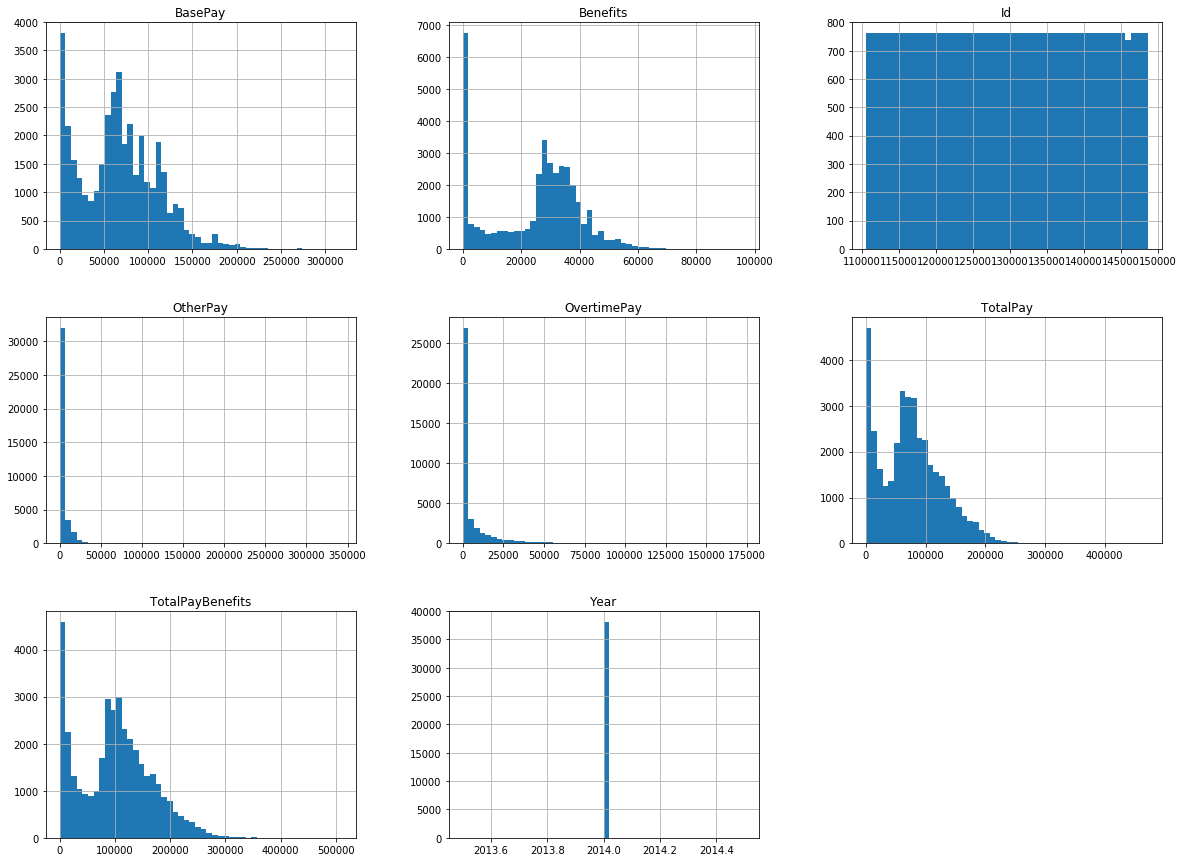

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Some of the histograms are a little bit right skewed, but this is not abnormal.

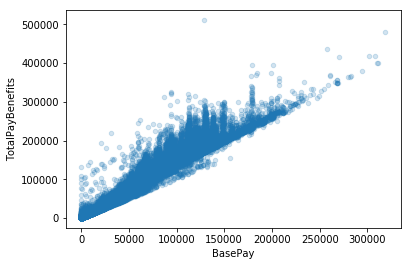

In [9]:
df.plot(kind="scatter", x="BasePay", y="TotalPayBenefits", alpha=0.2)
plt.savefig('map1.png')

### Import  KMeans and normalization 

In [10]:
from sklearn.cluster import KMeans,DBSCAN

In [11]:
from sklearn import preprocessing

In [12]:
std_scale = preprocessing.StandardScaler().fit(df[['BasePay', 'TotalPayBenefits']])
df_std = std_scale.transform(df[['BasePay', 'TotalPayBenefits']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['BasePay', 'TotalPayBenefits']])
df_minmax = minmax_scale.transform(df[['BasePay', 'TotalPayBenefits']])

In [13]:
print(df_std)

[[ 1.41991266  6.20017601]
 [ 5.72930769  5.73056078]
 [ 4.33221415  5.07438087]
 ..., 
 [-1.51419918 -1.51661579]
 [-1.51419918 -1.5166247 ]
 [-1.51419918 -1.51671007]]


In [14]:
model = KMeans(n_clusters=3)

In [15]:
model.fit(df_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
labels = model.predict(df_std)

In [17]:
print(labels)

[2 2 2 ..., 1 1 1]


In [18]:
xs = df_std[:,0]

In [19]:
ys = df_std[:,1]

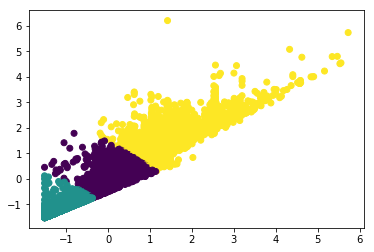

In [20]:
plt.scatter(xs,ys,c=labels)

### Compare with no scaling 

In [21]:
df_a = df[['BasePay','TotalPayBenefits','Benefits','OvertimePay']].copy()

In [22]:
model.fit(df_a)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
labels = model.predict(df_a)

In [24]:
xs = df_a['BasePay']

In [25]:
ys = df_a['TotalPayBenefits']

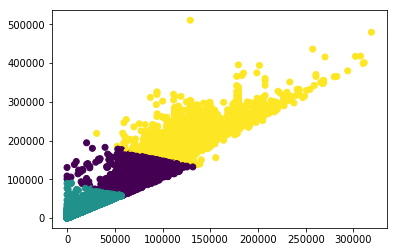

In [26]:
plt.scatter(xs,ys,c=labels)

### Just as predication, because Basepay and TotalPayBenefits are all weighed by dollar, so they have the same unit, thus there will have same outcome no matter wherther do normalization or not!  If the unit is not the same, then will should do normalization first, then the clustering

### Basically, the clusting, the top-right clustering and bottom-left one just corresponde to the Job Status: Full time and Part time

### Use DBSCAN

In [27]:
estimator = DBSCAN()

In [28]:
X = df_a[['BasePay','TotalPayBenefits']]

In [29]:
estimator.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [30]:
labels = estimator.labels_

In [31]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 1):
          colored_labels.append(colors[0]) 
        else:
          colored_labels.append(colors[1])
    return colored_labels

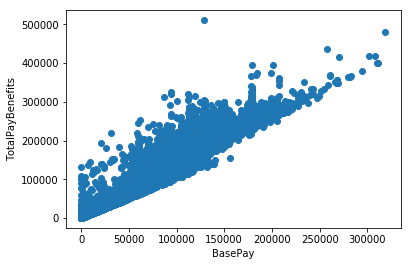

In [32]:
colors = set_colors(labels)
plt.scatter(df_a['BasePay'], df_a['TotalPayBenefits'])
plt.xlabel('BasePay')
plt.ylabel('TotalPayBenefits')
plt.show()

### From the outcomes provided by the KMeans and DBSCAN, we can see that the oucomes are different. In KMeans, we can identify the cluster numbers intennded to generate, however dbscan generate the number automatically. 

# Linear Model

In [33]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [34]:
X = df_a[['BasePay','OvertimePay','Benefits']]

In [35]:
y = df_a[['TotalPayBenefits']]

In [36]:
model = linear_model.LinearRegression()

In [37]:
results = model.fit(X,y)

In [38]:
print (results.intercept_, results.coef_)

[ 397.77393173] [[ 1.06766955  1.17491034  0.90555053]]


In [39]:
import seaborn as sns

AttributeError: module 'seaborn' has no attribute 'plt'

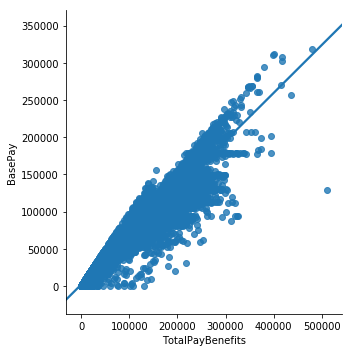

In [40]:
sns.lmplot(y="BasePay", x="TotalPayBenefits", data=df_a)
sns.plt.show()

The correlation is indeed very strong; you can clearly see the upward trend and that the points are not too dispersed.

### Next use statsmodels

In [43]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

/Users/bohan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [44]:
X = df_a[['BasePay']]

In [45]:
y = df_a[['TotalPayBenefits']]

In [46]:
model = sm.OLS(y, X)

In [47]:
results = model.fit()

In [48]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TotalPayBenefits   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.911e+06
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        10:04:04   Log-Likelihood:            -4.2442e+05
No. Observations:               38070   AIC:                         8.488e+05
Df Residuals:                   38069   BIC:                         8.488e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BasePay        1.4906      0.001   1382.350      0.000       1.489       1.493
==============================================================================
Omnibus:                    19927.336   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           305084.464
Skew:                           2.166   Prob(JB):                         0.00
Kurtosis:                      16.174   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  BasePay    1.490621
dtype: float64
R2:  0.98046702681


### We can see that the fit is significant:$$ R^2 = 0.98 $$

In [50]:
X = df_a[['Benefits']]

In [51]:
model = sm.OLS(y, X)

In [52]:
results = model.fit()

In [53]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TotalPayBenefits   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.088e+06
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        10:04:07   Log-Likelihood:            -4.3486e+05
No. Observations:               38070   AIC:                         8.697e+05
Df Residuals:                   38069   BIC:                         8.697e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Benefits       4.0251      0.004   1043.023      0.000       4.018       4.033
==============================================================================
Omnibus:                    16541.429   Durbin-Watson:                   1.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128735.672
Skew:                           1.916   Prob(JB):                         0.00
Kurtosis:                      11.153   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$ R^2 = 0.966 $$

In [54]:
X = df_a[['OvertimePay']]

In [55]:
model = sm.OLS(y, X)

In [56]:
results = model.fit()

In [57]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TotalPayBenefits   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.976e+04
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        10:04:26   Log-Likelihood:            -4.9138e+05
No. Observations:               38070   AIC:                         9.828e+05
Df Residuals:                   38069   BIC:                         9.828e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OvertimePay     5.4238      0.039    140.560      0.000       5.348       5.499
==============================================================================
Omnibus:                     2983.712   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16467.350
Skew:                          -0.139   Prob(JB):                         0.00
Kurtosis:                       6.210   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$ R^2 = 0.342 $$

#### From above, we can see the 'BasePay' is the most significant predictor.  And we may drop the 'OvertimePay', becasue it is some independent of all the other predictor variables

In [58]:
X = df_a[['BasePay','Benefits']]

In [59]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.9494


So, in our model, 94.94% of the variability in Y can be explained using X. This is quite exciting.

In [61]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
y_pred = regressor.predict(X_test)
regressor.score(X_test, y_test)

0.95001318825726955

So, in our model, 95% of the variability in Y can be explained using X.

In [64]:
multi_model = ols("TotalPayBenefits ~ BasePay + BasePay -1", data=df_a).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TotalPayBenefits   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.911e+06
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        10:04:32   Log-Likelihood:            -4.2442e+05
No. Observations:               38070   AIC:                         8.488e+05
Df Residuals:                   38069   BIC:                         8.488e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BasePay        1.4906      0.001   1382.350      0.000       1.489       1.493
==============================================================================
Omnibus:                    19927.336   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           305084.464
Skew:                           2.166   Prob(JB):                         0.00
Kurtosis:                      16.174   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
multi_model = ols("TotalPayBenefits ~ Benefits + Benefits -1", data=df_a).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TotalPayBenefits   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.088e+06
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        10:04:33   Log-Likelihood:            -4.3486e+05
No. Observations:               38070   AIC:                         8.697e+05
Df Residuals:                   38069   BIC:                         8.697e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Benefits       4.0251      0.004   1043.023      0.000       4.018       4.033
==============================================================================
Omnibus:                    16541.429   Durbin-Watson:                   1.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128735.672
Skew:                           1.916   Prob(JB):                         0.00
Kurtosis:                      11.153   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
multi_model = ols("TotalPayBenefits ~ OvertimePay + OvertimePay -1", data=df_a).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TotalPayBenefits   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.976e+04
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        10:04:33   Log-Likelihood:            -4.9138e+05
No. Observations:               38070   AIC:                         9.828e+05
Df Residuals:                   38069   BIC:                         9.828e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OvertimePay     5.4238      0.039    140.560      0.000       5.348       5.499
==============================================================================
Omnibus:                     2983.712   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16467.350
Skew:                          -0.139   Prob(JB):                         0.00
Kurtosis:                       6.210   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
df_a.corr()

,BasePay,TotalPayBenefits,Benefits,OvertimePay
BasePay,1.000000,0.967644,0.932145,0.274645
TotalPayBenefits,0.967644,1.000000,0.942653,0.471892
Benefits,0.932145,0.942653,1.000000,0.315889
OvertimePay,0.274645,0.471892,0.315889,1.000000


#### From above , there exists a multi-colinearity in the model

#### Add intercept

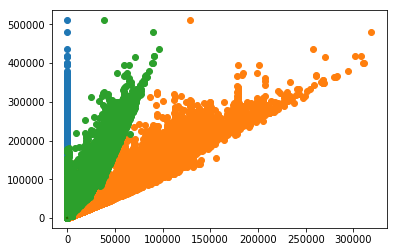

In [68]:
X = sm.add_constant(X) 
plt.plot(X, y, "o")
x2 = np.linspace(0, 80, 55)
y2 = 39.11 + (0.3994*x2)
plt.plot(x2, y2, lw=2, color="r")
x2 = np.linspace(55, 80, 33)
y2 = (0.963575*x2)
plt.plot(x2, y2, lw=2, color="g")
plt.show()

In [69]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TotalPayBenefits   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 3.538e+05
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        10:04:36   Log-Likelihood:            -4.1997e+05
No. Observations:               38070   AIC:                         8.400e+05
Df Residuals:                   38067   BIC:                         8.400e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -75.3766    143.658     -0.525      0.600    -356.950     206.196
BasePay        1.0202      0.005    212.148      0.000       1.011       1.030
Benefits       1.3082      0.013     96.989      0.000       1.282       1.335
==============================================================================
Omnibus:                    28271.136   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           809284.006
Skew:                           3.295   Prob(JB):                         0.00
Kurtosis:                      24.605   Cond. No.                     1.59e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const      -75.376633
BasePay      1.020180
Benefits     1.308210
dtype: float64
R2:  0.948950740149


### Now the fit is pretty good:$$ R^2 = 0.936 $$

### Cross Validation

In [71]:
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from scipy import stats

In [72]:
X = df_a[['BasePay','Benefits']]

In [73]:
y = df_a[['TotalPayBenefits']]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

Text(0.5,1,'Base vs Total')

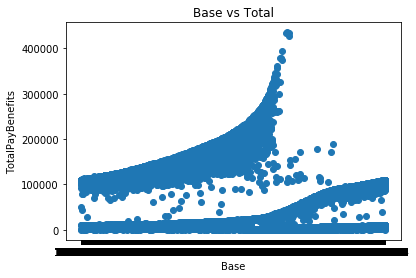

In [75]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Base")
plt.ylabel("TotalPayBenefits")
plt.title("Base vs Total")

In [76]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
print (linreg.intercept_)
print (linreg.coef_)

[-112.60412853]
[[ 1.02632962  1.29284157]]


In [77]:
np.median(y_test)

100902.87

In [78]:
y_m=np.mean(y_test)

In [79]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

14771.894303673133

In [80]:
rmse/y_m

TotalPayBenefits    0.147301
dtype: float64

### Regulation
### Ridge Regression

In [81]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5,1,'Ridge Regression - Base vs TotalPayBenefits')

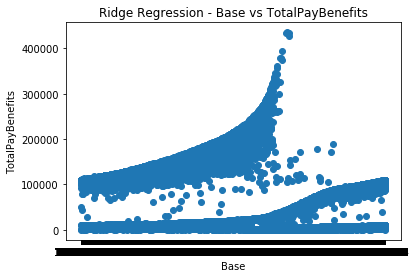

In [82]:
y_pred = ridge.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Base")
plt.ylabel("TotalPayBenefits")
plt.title("Ridge Regression - Base vs TotalPayBenefits")

In [83]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

14771.89430367318

In [84]:
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 5-fold CV: %.3f' %cv)

In [85]:
kf = KFold(len(X), n_folds=5)
scores = []
for train, test in kf:
    linreg.fit(X_train,y_train)
    scores.append(np.sqrt(metrics.mean_squared_error(y_test, linreg.predict(X_test))))
scores

[14771.894303673133,
 14771.894303673133,
 14771.894303673133,
 14771.894303673133,
 14771.894303673133]

In [86]:
show_stats('Ridge Regression',rmse ,np.mean(scores))

Method: Ridge Regression
RMSE on no CV training: 14771.894
RMSE on 5-fold CV: 14771.894


#### Actually the regularization does not help with creating models that validate better on out of sample data

# Logistic Regression

In [87]:
df['Status'] = np.where(df['Status']=='FT',1,df['Status'])

In [88]:
df['Status'] = np.where(df['Status']=='PT',0,df['Status'])

In [89]:
df['Status'] = pd.to_numeric(df['Status'])

In [90]:
df.std()

Id                  10992.844298
BasePay             44017.308649
OvertimePay         11775.631609
OtherPay             7771.084352
Benefits            15693.028647
TotalPay            51656.873381
TotalPayBenefits    66183.709624
Year                    0.000000
Status                  0.492440
dtype: float64

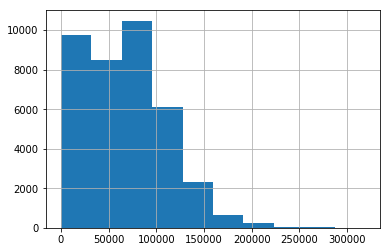

In [91]:
df.BasePay.hist()

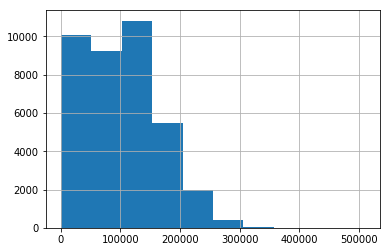

In [92]:
df.TotalPayBenefits.hist()

In [93]:
df_l = df[['BasePay','TotalPayBenefits','OvertimePay','TotalPay','Benefits','Status']].copy()

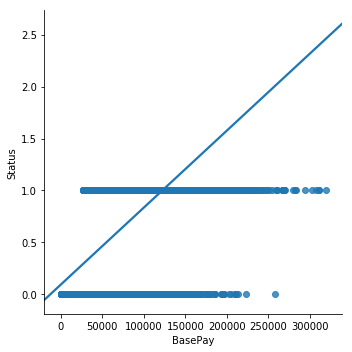

In [94]:
sns.lmplot(x='BasePay', y='Status', data=df_l, ci=None)

In [95]:
df_l['intercept'] = 1.0
df_l.head()

,BasePay,TotalPayBenefits,OvertimePay,TotalPay,Benefits,Status,intercept
110531,129150.01,510732.68,0.00,471952.64,38780.04,0,1.0
110532,318835.49,479652.21,10712.95,390111.98,89540.23,1,1.0
110533,257340.00,436224.36,0.00,339653.70,96570.66,0,1.0
110534,307450.04,418019.22,0.00,326716.76,91302.46,1,1.0
110535,302068.00,417435.10,0.00,326233.44,91201.66,1,1.0


In [96]:
pred=['BasePay','intercept']
pred

['BasePay', 'intercept']

In [97]:
df_l['Status'] = pd.to_numeric(df_l['Status'])

In [98]:
import scipy.stats
import statsmodels
from statsmodels.sandbox.stats.multicomp import fdrcorrection0
from statsmodels.stats.multitest import fdrcorrection
from numpy import nanmean
from scipy import stats

In [99]:
fdrcorrection

<function statsmodels.stats.multitest.fdrcorrection>

In [100]:
df_l_model = sm.Logit(df_l['Status'], df_l[pred]).fit()

Optimization terminated successfully.
         Current function value: 0.377712
         Iterations 7


In [101]:
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [102]:
df_l_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                38070
Model:                          Logit   Df Residuals:                    38068
Method:                           MLE   Df Model:                            1
Date:                Thu, 22 Feb 2018   Pseudo R-squ.:                  0.4429
Time:                        10:08:44   Log-Likelihood:                -14379.
converged:                       True   LL-Null:                       -25813.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
BasePay     5.961e-05   6.01e-07     99.204      0.000    5.84e-05    6.08e-05
intercept     -3.1892      0.037    -85.234      0.000      -3.262      -3.116
==============================================================================
"""

BasePay is statistically significant (At .05 significance level, P>|z| < .05)

In [103]:
df_l_model.conf_int()

,0,1
BasePay,0.000058,0.000061
intercept,-3.262493,-3.115824


In [104]:
df_l_model.conf_int(alpha=0.01)

,0,1
BasePay,0.000058,0.000061
intercept,-3.285537,-3.092780


In [105]:
np.exp(df_l_model.params)

BasePay      1.000060
intercept    0.041207
dtype: float64

In [106]:
params = df_l_model.params
conf = df_l_model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
BasePay,1.000058,1.000061,1.000060
intercept,0.038293,0.044342,0.041207


In [107]:
y = df_l[['Status']]

In [108]:
X = df_l[['BasePay']]

In [109]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.550969
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                38070
Model:                          Logit   Df Residuals:                    38069
Method:                           MLE   Df Model:                            0
Date:                Thu, 22 Feb 2018   Pseudo R-squ.:                  0.1874
Time:                        10:08:56   Log-Likelihood:                -20975.
converged:                       True   LL-Null:                       -25813.
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
BasePay     1.587e-05   1.79e-07     88.679      0.000    1.55e-05    1.62e-05


### Logistic Regression Model Fitting

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/bohan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Predicting the test set results and calculating the accuracy

In [111]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.60


#### Accuracy of logistic regression classifier on test set: 0.60

### Actuaaly, this logistic model is not so good. Because the TotalPayBenefits is quite linearly related to the BasePay

### Cross Validation

In [112]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

/Users/bohan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bohan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bohan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bohan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

10-fold cross validation average accuracy: 0.595


### From above, we can see that this validation is not so exciting.

### Confusion Matrix

In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  97 4573]
 [   0 6751]]


#### The result is telling us that we have 97+6751 correct predictions and 0+4753 incorrect predictions.

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.02      0.04      4670
          1       0.60      1.00      0.75      6751

avg / total       0.76      0.60      0.46     11421

